# Dataset and load library

Data from the Ames Assessor's Office includes 82 columns and 2930 records of sold properties from 2006-2010. Details on the dataset can be found in this website: https://www.openintro.org/data/index.php?data=ames

In [53]:
# Load the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split
import seaborn as sb

# Read in the data file
data = pd.read_csv(
    'AmesHousing.txt',
    sep='\t',
    keep_default_na=False,
    na_values=[''])

## Data Cleaning

In [54]:
data45 = data.dropna()
data45.describe().round(3).transpose()
data45.info()
data45 = data45.copy()
data45['logsp'] = np.log(data45['SalePrice'])
#data45.loc[:, 'logsp'] = np.log(data45['SalePrice'])
print(data45)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2269 non-null   int64  
 1   PID              2269 non-null   int64  
 2   MS SubClass      2269 non-null   int64  
 3   MS Zoning        2269 non-null   object 
 4   Lot Frontage     2269 non-null   float64
 5   Lot Area         2269 non-null   int64  
 6   Street           2269 non-null   object 
 7   Alley            2269 non-null   object 
 8   Lot Shape        2269 non-null   object 
 9   Land Contour     2269 non-null   object 
 10  Utilities        2269 non-null   object 
 11  Lot Config       2269 non-null   object 
 12  Land Slope       2269 non-null   object 
 13  Neighborhood     2269 non-null   object 
 14  Condition 1      2269 non-null   object 
 15  Condition 2      2269 non-null   object 
 16  Bldg Type        2269 non-null   object 
 17  House Style   

### Correlation Matrix
This is to understand data relationship between target, SalePrice, and features. Identifying features who has multicollinearity (high correlation) improves model perfomance by combining features or remove irrelevant features.

,logsp,SalePrice,Overall Qual,Garage Area,Gr Liv Area,Total Bsmt SF,nin
count,2269.000,2269.000,2269.000,2269.000,2269.000,2269.000,2269.000
mean,12.039,184317.206,6.180,498.257,1503.137,1065.648,13.225
std,0.408,83397.281,1.422,193.710,502.355,445.508,6.332
min,9.456,12789.000,1.000,100.000,407.000,0.000,0.000
25%,11.775,130000.000,5.000,350.000,1141.000,794.000,7.000
50%,11.986,160500.000,6.000,483.000,1444.000,994.000,13.000
75%,12.278,215000.000,7.000,588.000,1734.000,1324.000,18.000
max,13.534,755000.000,10.000,1488.000,5642.000,6110.000,25.000


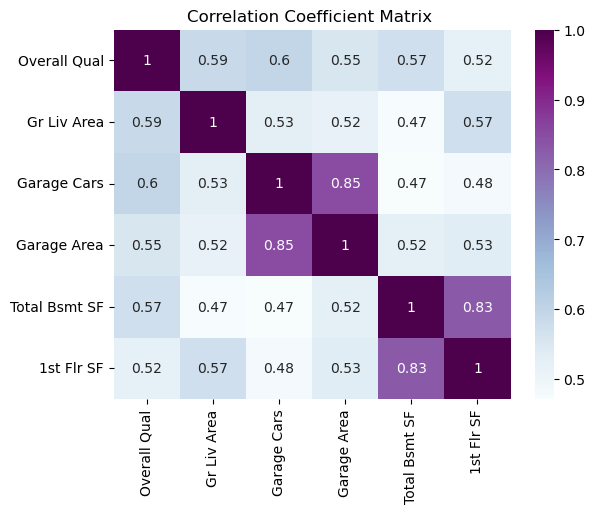

In [55]:
sudata1 = data45[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF']]
sudata1 = sudata1.corr()
ax = plt.axes()
sb.heatmap(sudata1, cmap="BuPu", annot=True)
ax.set_title('Correlation Coefficient Matrix ')

data42 = data45['Neighborhood']
data42 = pd.get_dummies(data42)
data42['nin'] = data42.cumsum(axis=1).ne(1).sum(axis=1)
data1_format = data45.join(data42['nin'])
data1 = data1_format[['logsp','SalePrice','Overall Qual','Garage Area','Gr Liv Area','Total Bsmt SF','nin']]
data1.describe().round(3)

## OLS Regression
Model 1 is taken based on research consideration and correlation matrix. The model is evaluated using residual checks, residual mean is to check for bias, closer to 0 is ideal.

In [56]:
# Model 1
x1 = data1[['Gr Liv Area','Overall Qual', 'Total Bsmt SF']].to_numpy()
y1 = data1['logsp'].to_numpy()

m1_reg = LinearRegression()
mod1 = m1_reg.fit(x1.reshape(-1,3),y1)

xc1 = sm.add_constant(x1)
model1 = sm.OLS(y1,xc1).fit()
predictions1 = model1.predict(xc1)
print_model1 = model1.summary()
print(print_model1)
print(mod1.intercept_)
print(mod1.coef_)

matrix1 = pd.DataFrame(data1, columns=['Gr Liv Area','Overall Qual', 'Total Bsmt SF'])
matrix1 = matrix1.corr()
print(matrix1.round(3))

# Residual check Model 1
print(model1.resid.mean())

#plt.figure(figsize=(10,7))
#plt.scatter(model1.predict(),model1.resid)
#plt.axhline(y=0,c='red', alpha=0.3)
#plt.title('M1')
#plt.show()

#figqres = y1 - predictions1
#fig = sm.qqplot(figqres, line='45')
#fig = sm.qqplot(model1.resid, line='45')
#plt.title('QQplot of the standardised log transformed sale price values', fontsize=12)
#plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     2788.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:18:27   Log-Likelihood:                 569.76
No. Observations:                2269   AIC:                            -1132.
Df Residuals:                    2265   BIC:                            -1109.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5151      0.018    590.932      0.0

Model 2 is added for comparison

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2755.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:18:27   Log-Likelihood:                 559.19
No. Observations:                2269   AIC:                            -1110.
Df Residuals:                    2265   BIC:                            -1087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4990      0.018    588.032      0.0

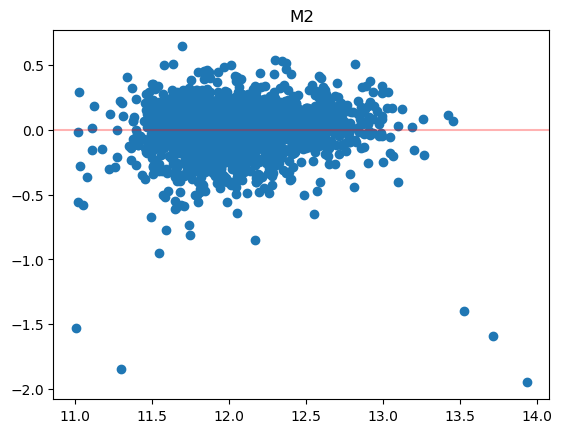

In [57]:
x2 = data1[['Gr Liv Area','Overall Qual','Garage Area']].to_numpy()
y2 = data1['logsp'].to_numpy()
m2_reg = LinearRegression()
mod2 = m2_reg.fit(x2.reshape(-1,3),y2)

xc2 = sm.add_constant(x2)
model2 = sm.OLS(y2,xc2).fit()
predictions2 = model2.predict(xc2)
print_model2 = model2.summary()
print(print_model2)
print(mod2.intercept_)
print(mod2.coef_)

matrix2 = pd.DataFrame(data1, columns=['Gr Liv Area','Overall Qual','Garage Area']) 
matrix2 = matrix2.corr()
print(matrix2.round(3))

# Residual check Model 2
print(model2.resid.mean())
plt.scatter(model2.predict(),model2.resid)
plt.axhline(y=0,c='red', alpha=0.3)
plt.title('M2')
plt.show()

#fig = sm.qqplot(model2.resid, line='45')
#plt.title('QQplot of the standardised log transformed sale price values', fontsize=12)
#plt.show()


### Model Evaluation
Train test split is to evaluate how the model will perform on unseen data. The dataset is split into training and test set to prevent overfitting

In [58]:
# train test split
yval = np.exp(data1['logsp'])
print(yval.describe())

count      2269.000000
mean     184317.206258
std       83397.280646
min       12789.000000
25%      130000.000000
50%      160500.000000
75%      215000.000000
max      755000.000000
Name: logsp, dtype: float64


Model 1

In [59]:
# Use test train vali = 0.2 0.6 0.2
x1p2 = data1[['Gr Liv Area','Overall Qual']].to_numpy()
y1p2 = yval

x1p2_tv, x1p2_test, y1p2_tv, y1p2_test = train_test_split(x1p2, y1p2, test_size = 0.2, random_state = 1)
x1p2_train, x1p2_vali, y1p2_train, y1p2_vali = train_test_split(x1p2_tv, y1p2_tv, test_size=0.2/0.8, random_state = 1)

print(x1p2_tv.shape,x1p2_test.shape,y1p2_tv.shape,y1p2_test.shape)
print(x1p2_train.shape,x1p2_vali.shape,y1p2_train.shape,y1p2_vali.shape)

linear_reg = LinearRegression()
linear_reg.fit(x1p2_train, y1p2_train)
pred1p2_vali = linear_reg.predict(x1p2_vali)
linear_reg.fit(x1p2_tv, y1p2_tv)
pred1p2_test = linear_reg.predict(x1p2_test)

# Accuracy test Model 1
result = linear_reg.score(x1p2_test, y1p2_test)
print(result)
mse1p2_test = mse(y1p2_test, pred1p2_test)
mse1p2_vali = mse(y1p2_vali, pred1p2_vali)

print('Test:', x1p2_test.shape)
print('Train and vali:', x1p2_tv.shape)
print('Training:', x1p2_train.shape)
print('Validation:', x1p2_vali.shape)
print('Test mse: {:.4f}'.format(mse1p2_test))
print('Validation mse: {:.4f}'.format(mse1p2_vali))


(1815, 2) (454, 2) (1815,) (454,)
(1361, 2) (454, 2) (1361,) (454,)
0.7231058722506646
Test: (454, 2)
Train and vali: (1815, 2)
Training: (1361, 2)
Validation: (454, 2)
Test mse: 1891434817.7007
Validation mse: 1760981448.0360


Model 2

In [60]:
x2p2 = data1[['Gr Liv Area','Overall Qual','Garage Area']].to_numpy()
y2p2 = yval

x2p2_tv, x2p2_test, y2p2_tv, y2p2_test = train_test_split(x2p2, y2p2, test_size = 0.2, random_state = 1)
x2p2_train, x2p2_vali, y2p2_train, y2p2_vali = train_test_split(x2p2_tv, y2p2_tv, test_size=0.2/0.8, random_state = 1)

print(x2p2_tv.shape,x2p2_test.shape,y2p2_tv.shape,y2p2_test.shape)
print(x2p2_train.shape,x2p2_vali.shape,y2p2_train.shape,y2p2_vali.shape)

linear_reg = LinearRegression()
linear_reg.fit(x2p2_train, y2p2_train)
pred2p2_vali = linear_reg.predict(x2p2_vali)
linear_reg.fit(x2p2_tv, y2p2_tv)
pred2p2_test = linear_reg.predict(x2p2_test)

# Accuracy test Model 2
result = linear_reg.score(x2p2_test, y2p2_test)
print(result)
mse2p2_test = mse(y2p2_test, pred2p2_test)
mse2p2_vali = mse(y2p2_vali, pred2p2_vali)

print('Test:', x2p2_test.shape)
print('Train and vali:', x2p2_tv.shape)
print('Training:', x2p2_train.shape)
print('Validation:', x2p2_vali.shape)
print("Test mse: {:.4f}".format(mse2p2_test))
print("Validation mse: {:.4f}".format(mse2p2_vali))

create_index = pd.DataFrame(y2p2_tv)
msaleprice = y2p2_tv.mean()
create_index.insert(0,'meansaleprice',msaleprice)
print(create_index)
  

(1815, 3) (454, 3) (1815,) (454,)
(1361, 3) (454, 3) (1361,) (454,)
0.7382104393235376
Test: (454, 3)
Train and vali: (1815, 3)
Training: (1361, 3)
Validation: (454, 3)
Test mse: 1788257100.2816
Validation mse: 1686912718.5073
      meansaleprice     logsp
881   184708.402204  190000.0
1582  184708.402204  175000.0
805   184708.402204  239500.0
1729  184708.402204  178900.0
809   184708.402204  147983.0
...             ...       ...
1227  184708.402204  112900.0
1154  184708.402204  142000.0
1405  184708.402204  155000.0
299   184708.402204  162500.0
1348  184708.402204  128000.0

[1815 rows x 2 columns]


Benchmark model is created based on Model 2. 

In [61]:
# Base model based on model 2: Use train validation set from M2, and calculate mean from this array
create_index['index1'] = create_index.index
data_bm2 = data1[['SalePrice','nin','Overall Qual','Garage Area','Gr Liv Area','Total Bsmt SF']]
data_bm2['index'] = data_bm2.index
data_bm2_output = (create_index.merge(data_bm2, left_on=['index1'], right_on=['index'])
                               .reindex(columns=['index1','index','SalePrice','nin','Overall Qual','Garage Area',
                                                 'Gr Liv Area','Total Bsmt SF']))
cnsp = data_bm2_output.groupby('nin')['SalePrice'].mean()
cnsp = pd.DataFrame(cnsp)
cnsp.columns = ['meanspnin']
cnsp['nin2'] = cnsp.index
out5 = (data_bm2_output.merge(cnsp, left_on=['nin'], right_on=['nin2'])
                        .reindex(columns=['index1','index','SalePrice','nin','nin2','meanspnin','Overall Qual',
                                          'Garage Area', 'Gr Liv Area','Total Bsmt SF']))
print(out5)

Xb2a = x2p2_tv
yb2 = out5['meanspnin'] 

Xb2_tv, Xb2_test, yb2_tv, yb2_test = train_test_split(Xb2a, yb2, test_size = 0.25, random_state=1)
testb2_mse = mse(yb2_test,pred2p2_test)
print('MSE against BM2: {:.2f}'.format(testb2_mse))

      index1  index  SalePrice  nin  nin2      meanspnin  Overall Qual  \
0        881    881     190000    5     5  204383.555556             7   
1        262    262     127000    5     5  204383.555556             5   
2        869    869     220000    5     5  204383.555556             8   
3       1458   1458     222500    5     5  204383.555556             7   
4       2778   2778     200000    5     5  204383.555556             7   
...      ...    ...        ...  ...   ...            ...           ...   
1810     413    413     137900   14    14  141447.058824             6   
1811    2373   2373     146300   14    14  141447.058824             6   
1812     409    409     146000   14    14  141447.058824             6   
1813     412    412     147000   14    14  141447.058824             6   
1814     415    415     148500   14    14  141447.058824             6   

      Garage Area  Gr Liv Area  Total Bsmt SF  
0           570.0         1500         1500.0  
1           484

# Result
### Size of above ground living area in square feet, overall qualification of the house, and size of garage area in square feet influence house residental sale price.